In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D,axes3d

from IPython.core.pylabtools import figsize
import scipy.stats as stats
%matplotlib inline
figsize(12.5,7)


#Gaussian Processes in 3 dimensions
##get the data

C:\Users\Trost\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


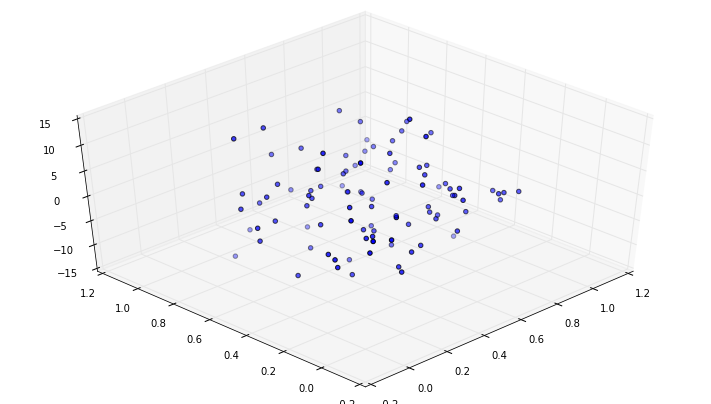

In [2]:
np.random.seed(422)
num_obs = 100

observed = np.array([np.random.uniform(0,1,num_obs),np.random.uniform(0,1,num_obs)])
observed_y2 = np.atleast_2d(np.array(np.random.normal(1,3,num_obs))).T \
                + np.atleast_2d(np.array(np.random.normal(0,100,num_obs))).T\
                + np.atleast_2d(np.array(np.random.uniform(-3,3,num_obs))).T

left = np.array(np.random.normal(1,3,num_obs/2))

right = np.array(np.random.normal(0,7,num_obs/2))
observed_y = np.zeros(shape=(num_obs,))
observed_y[:num_obs/2]=right
observed_y[num_obs/2:]=left
observed_y = np.atleast_2d(observed_y).T     

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(observed[0],observed[1],observed_y)
ax.view_init(elev=45,azim=225)


## prepare the prior, select covariance function

C:\Users\Trost\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):
C:\Users\Trost\Anaconda3\lib\site-packages\matplotlib\collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):


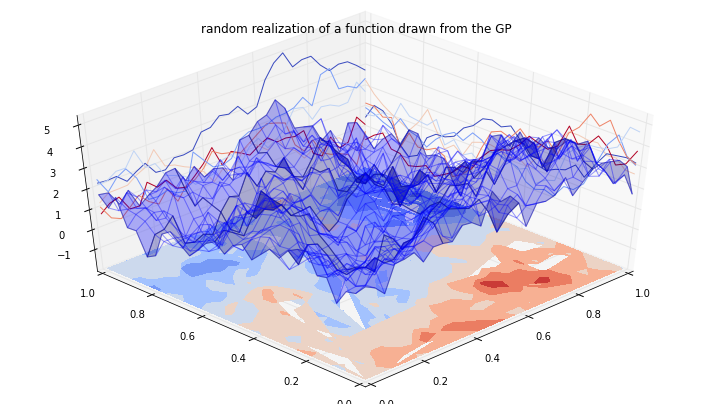

In [3]:
figsize=(22.5,8)

value='c'

c=1
kernel = {
    'a': lambda x,y: c*x.T.dot(y),
    'b': lambda x,y: np.exp(-100*(x-y).T.dot(x-y)),
    'c': lambda x,y: np.exp(-1*np.sqrt((x-y).T.dot(x-y)))
}[value]

sigma_n = .1
errorf = lambda x,y: sigma_n**2*(x==y).all()

n_points=30
points = np.linspace(0,1,n_points).T
[u,v] = np.meshgrid(points,points)
x = np.array([u.flatten(),v.flatten()])#arrays zu 1d machen
n = x.shape[1]

C = np.zeros((n,n))

for i in range(n):
    for j in range(n):
        C[i,j]=kernel(x[:,i],x[:,j]) + errorf(x[:,i],x[:,j])
        
num_ = 1
dist = stats.norm
fac = dist.rvs(0,1,(num_,1))

a, s, b = np.linalg.svd(C, full_matrices=True)
tmp = a.dot(np.sqrt(s))*fac.T

z = tmp.reshape((n_points,n_points))

#plotting
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(u,v,z
                ,shade=True,
                rstride=8, cstride=8, alpha=0.3
               );
ax.plot_wireframe(u,v,z,alpha=.4)
cset = ax.contourf(u,v,z, zdir='z', offset=np.min(z), cmap=cm.coolwarm)
cset = ax.contour(u,v,z, zdir='x', offset=np.max(x), cmap=cm.coolwarm)
cset = ax.contour(u,v,z, zdir='y', offset=np.max(u), cmap=cm.coolwarm)


ax.view_init(elev=45,azim=225)
plt.title("random realization of a function drawn from the GP")




##fit the process and plot the mean

C:\Users\Trost\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):
C:\Users\Trost\Anaconda3\lib\site-packages\matplotlib\collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):


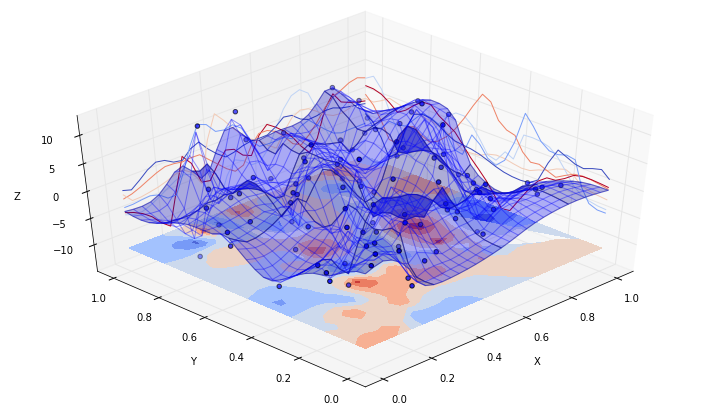

In [4]:
cbb  = np.zeros((num_obs,num_obs))
cab = np.zeros((n,num_obs))
caa = C
cba = np.zeros((num_obs,n))


for i in range(num_obs):
    for j in range(num_obs):
        cbb[i,j] = kernel(observed[:,i],observed[:,j])
        
for i in range(n):
    for j in range(num_obs):
        cba[j,i] = kernel(x[:,i],observed[:,j])
        
for i in range(num_obs):
    for j in range(n):
        cab[j,i] = kernel(observed[:,i],x[:,j])
        

    
tmp = cab.dot(np.linalg.inv(cbb))
m = tmp.dot(observed_y- np.atleast_2d(np.mean(observed_y,axis=0)))


d = caa - cab.dot(np.linalg.inv(cbb)).dot(cba)

dist = stats.multivariate_normal

fac = dist.rvs(cov=d)
fac = (np.atleast_2d(fac)+m.T).T
a, s, b = np.linalg.svd(C, full_matrices=True)
tmp = a.dot(np.sqrt(s))*fac.T

z1 = tmp.reshape((n_points,n_points))
z = m.reshape((n_points,n_points))


#plotting
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(u,v,z
                ,shade=True,
                rstride=8, cstride=8, alpha=0.3
               );



ax.plot_wireframe(u,v,z,alpha=.4)
ax.scatter(observed[0],observed[1],observed_y)



ax.view_init(elev=45,azim=225)


cset = ax.contourf(u,v,z, zdir='z', offset=np.min(z), cmap=cm.coolwarm)
cset = ax.contour(u,v,z, zdir='x', offset=np.max(x), cmap=cm.coolwarm)
cset = ax.contour(u,v,z, zdir='y', offset=np.max(u), cmap=cm.coolwarm)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')


